In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(url)

In [3]:
filmes.columns = ['filme_id','titulo','genero']
filmes.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


 - Criando um novo DataFrame 

In [4]:
generos = filmes.genero.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)

In [6]:
dados_dos_filmes.head()

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


 - Reescalando os dados.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

In [8]:
from sklearn.cluster import KMeans

In [9]:
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)

print(' Grupos {}'.format(modelo.labels_))

 Grupos [0 0 1 ... 1 0 1]


In [10]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-5.91799474e-02 -1.05508148e-01  8.95937074e-01  2.23403446e+00
   2.59603172e+00  2.54235311e-01 -3.28057934e-01 -2.01701196e-01
  -5.94742444e-01  8.89809778e-01 -9.49256298e-02 -2.72231455e-01
   1.91733242e-01  4.12208454e-01 -1.33860560e-01 -2.71369344e-01
   4.34381041e-02 -4.69166331e-01 -1.73866538e-01 -8.15468129e-02]
 [ 2.68694627e-02 -4.72196710e-01 -2.75756261e-01 -2.51907634e-01
  -2.70451223e-01  7.90647513e-02 -2.93510296e-02  9.44343861e-02
   1.74316101e-01 -1.49537909e-01  3.35801248e-02  6.88645379e-04
  -1.16581054e-01 -5.79452683e-04  1.77130816e-02  1.42496167e-01
  -3.15579080e-01 -8.35694612e-02 -1.51624503e-02 -9.81077024e-04]
 [-5.91799474e-02  1.53279638e+00  4.83208521e-01 -1.675413

In [11]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)
grupos = grupos.T

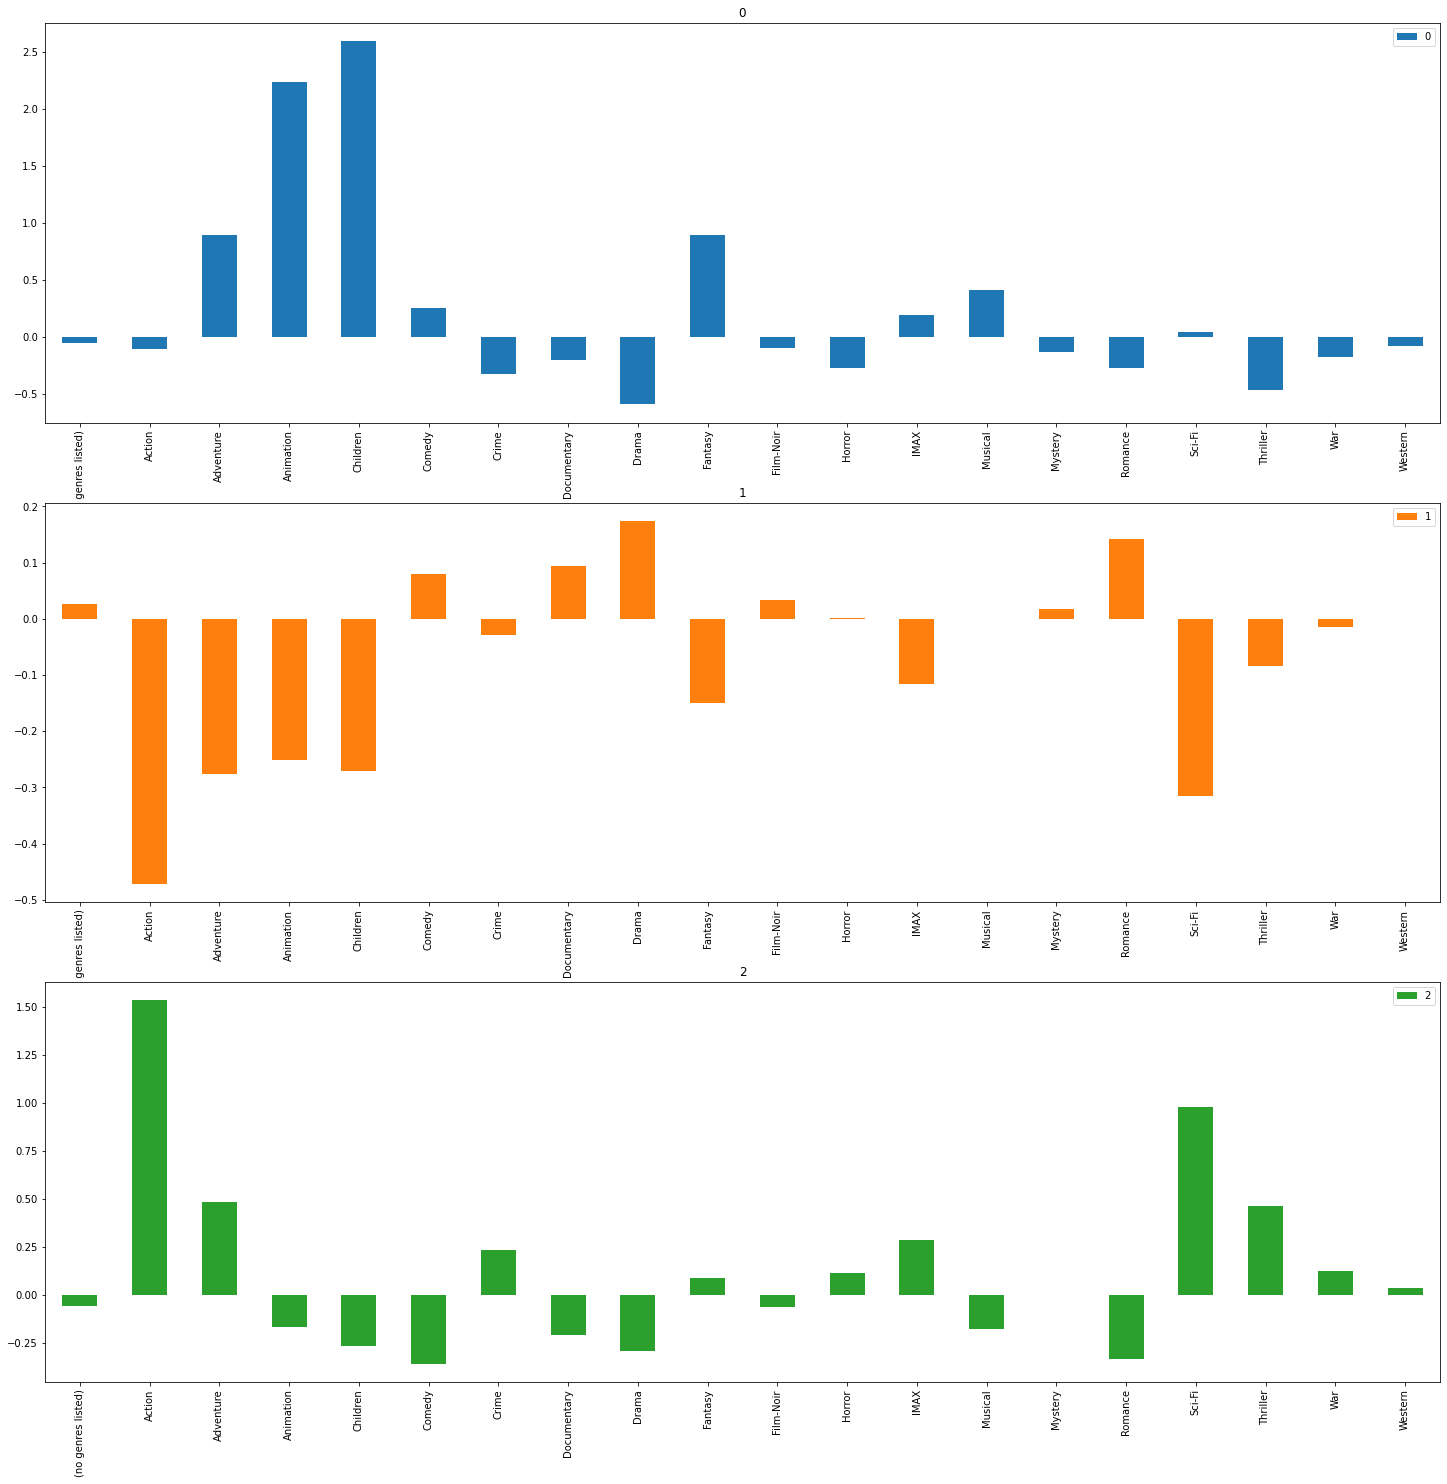

In [12]:
grupos.plot.bar(subplots = True,
              figsize = (25,25),
              sharex=False)
plt.show()

 - Criando um filtro e verificando se a agrupação do KMeans fez sentido .

In [13]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1444,1967,Labyrinth (1986),Adventure|Fantasy|Musical,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1343,1826,Barney's Great Adventure (1998),Adventure|Children,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7455,81564,Megamind (2010),Action|Animation|Children|Comedy|Sci-Fi|IMAX,0,1,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
9507,170939,Captain Underpants: The First Epic Movie (2017),Action|Animation|Children|Comedy,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7919,95377,One Man Band (2005),Animation|Comedy|Musical,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4360,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9670,182731,Pixel Perfect (2004),Children|Comedy|Sci-Fi,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
5490,26340,"Twelve Tasks of Asterix, The (Les douze travau...",Action|Adventure|Animation|Children|Comedy|Fan...,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9294,158813,Alice Through the Looking Glass (2016),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1559,2096,Sleeping Beauty (1959),Animation|Children|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


 - Utilizando um algoritmo pra reduzir o número de dimensões e facilitar a visualização.

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE()

In [16]:
visualizacao =  tsne.fit_transform(generos_escalados)
visualizacao

array([[ 66.10089  ,  25.524149 ],
       [  8.417561 , -10.309602 ],
       [-19.520147 ,  31.506535 ],
       ...,
       [ 27.464294 ,   5.137997 ],
       [ 51.31583  ,  15.023749 ],
       [-10.426792 ,   5.9048767]], dtype=float32)

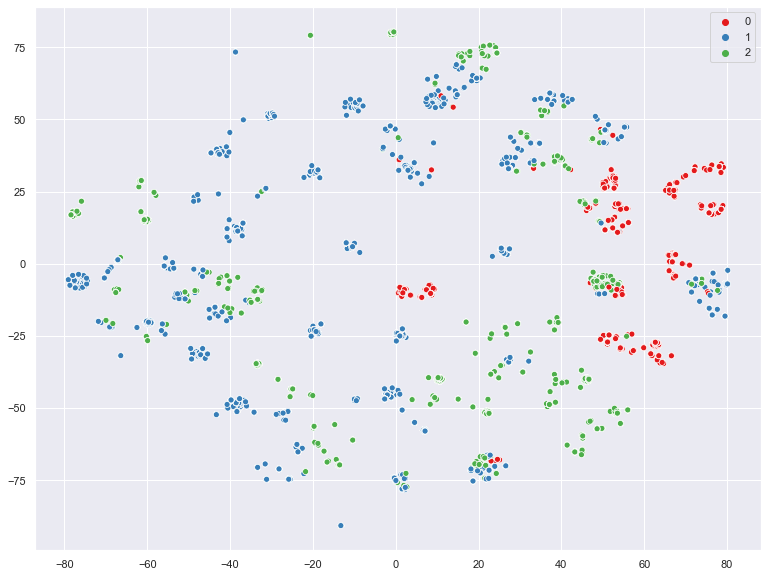

In [17]:
# plt.figure(figsize = (13,10))
sns.set(rc={'figure.figsize':(13,10)})

sns.scatterplot(x = visualizacao[:, 0],
               y = visualizacao[:, 1],
               hue =modelo.labels_,
               palette = sns.color_palette('Set1',3))

 - Aumentando a quantidade de grupos.

In [18]:
modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)


grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
1,-0.05918,-0.223634,-0.285574,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.011577,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
2,-0.05918,1.645352,2.591019,-0.188575,-0.259210,-0.425450,-0.348763,-0.217489,-0.478666,-0.294810,-0.094926,-0.277496,-0.128397,-0.188419,-0.237946,-0.243631,1.332552,0.260352,-0.202020,-0.132065
3,-0.05918,-0.393599,-0.246897,-0.258679,-0.270451,1.135924,-0.297079,-0.217489,-0.900247,-0.106946,-0.094926,-0.284601,-0.128397,-0.188419,-0.249986,2.259206,-0.299142,-0.464435,-0.202020,-0.132065
4,-0.05918,-0.147182,-0.268514,-0.185464,-0.239146,-0.528722,0.489914,-0.217489,0.138996,-0.025752,-0.094926,0.525732,-0.128397,-0.188419,4.000218,-0.144205,0.059004,1.173369,-0.202020,-0.132065


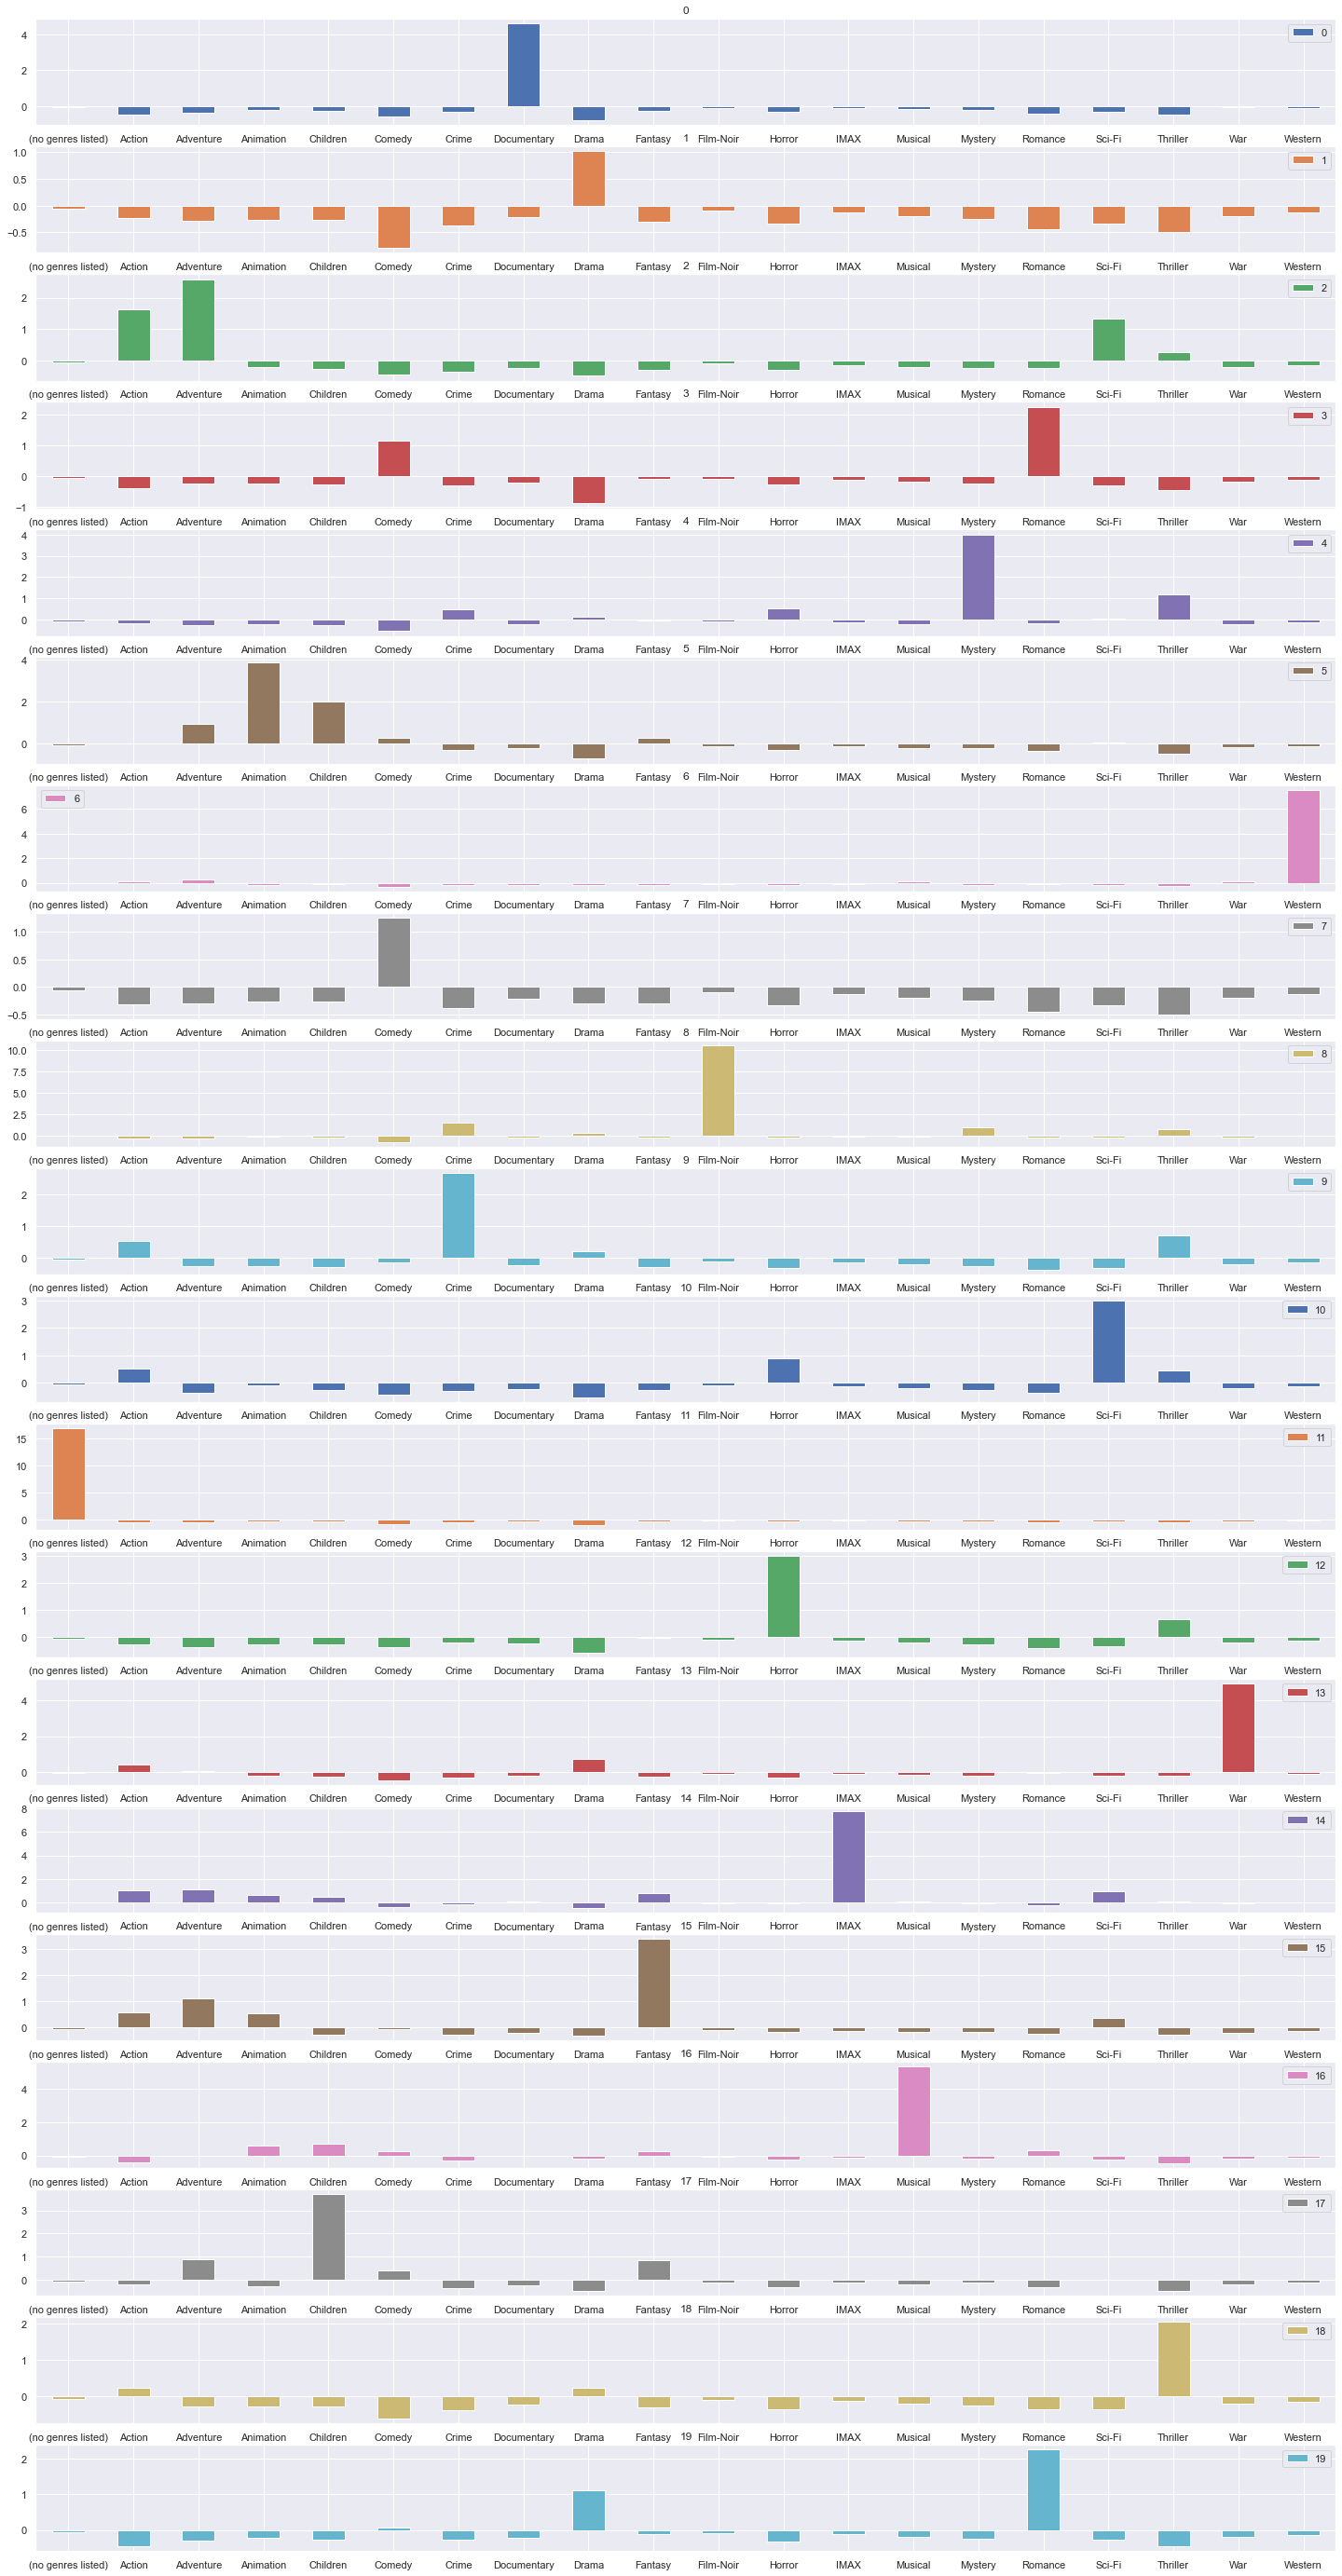

In [19]:
grupos.T.plot.bar(subplots = True,
              figsize = (25,50),
              sharex=False,
              rot = 0)
plt.show()

 - Criando um filtro e verificando se a agrupação do KMeans fez sentido .

In [20]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3608,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
287,329,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7765,91485,"Expendables 2, The (2012)",Action|Adventure,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3526,4818,Extreme Days (2001),Action|Adventure|Comedy|Drama,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
636,809,Fled (1996),Action|Adventure,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,2683,Austin Powers: The Spy Who Shagged Me (1999),Action|Adventure|Comedy,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8974,138036,The Man from U.N.C.L.E. (2015),Action|Adventure|Comedy,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
84,95,Broken Arrow (1996),Action|Adventure|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5241,8591,"Philadelphia Experiment, The (1984)",Adventure|Drama|Sci-Fi,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
385,442,Demolition Man (1993),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


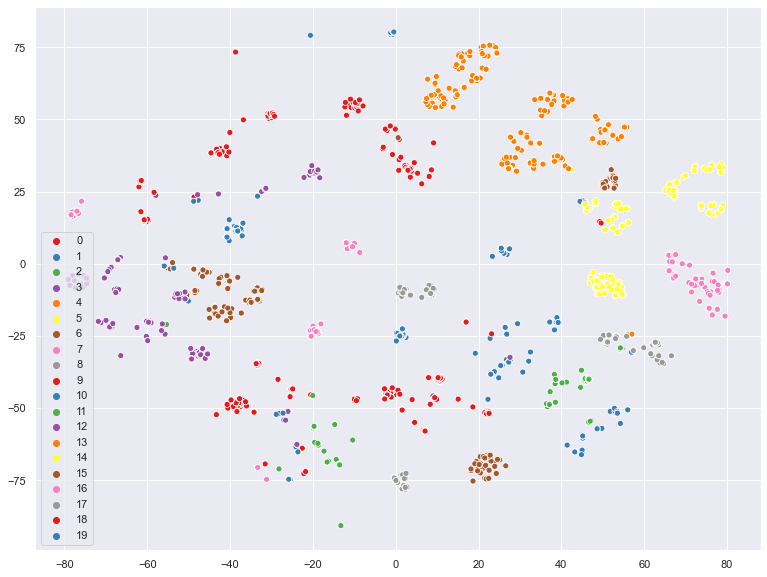

In [21]:
sns.set(rc={'figure.figsize':(13,10)})

sns.scatterplot(x = visualizacao[:, 0],
               y = visualizacao[:, 1],
               hue =modelo.labels_,
               palette = sns.color_palette('Set1',20))

 - Tentando achar o melhor numero de clusters.

In [22]:
# Criando uma função para calcular o erro de acordo com o número de clusters.

def kmeans(numero_de_clusters, generos):
    modelo = KMeans(n_clusters = numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [23]:
Kmeans(10, generos_escalados)

[10, 105515.72887407846]